# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

The dataset is German Traffic Signs.  The dataset provided in a zip was already pickled and all images are at 32X32X3, eventhough the original images are larger.  The images have already been cropped and the sign is centered with adequate padding between the sign and the edge of image for edge detection methods.

#### Note
The video in the lab mentions that the data set does not have a validation set and to use a split from train.  However, when I unzipped the file, it did have a valiation set.  We caI set it up so that I can switch back and forth betwen the validation set provided and one split from training set to see if there are any changes in results.

In [17]:
# Load pickled data
import pickle
import csv
from sklearn.model_selection import train_test_split

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)    
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# use part of train as validation, comment out to use validation set provided from zip
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

# read in sign names 
with open('signnames.csv') as csvfile:
    sign_names = csv.reader(csvfile, delimiter=',')
    sign_names = dict(sign_names)
del sign_names['ClassId']

print("Data loaded.")


Data loaded.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

The provided dataset has 34799 training images, 4410 validation images, and 12630 testing images.  However, if validatoin set is split from training then there are 27839 training images, 6960 validation images.

There are a total of 43 different signs/features.  These are described in signnames.csv which is also read in.

In [2]:
# explore data

# TODO: Number of training examples
n_train = len(X_train) 

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(sign_names.keys())

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 27839
Number of validation examples = 6960
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

The bar chart below shows how many of each sign there are in the training set.  You can see that some signs are ten times more prevalent than others.  

In addition 5 images are chosen at random from training set and displayed to get a feel for what they look like.  The name of the signs are also provided.  While the signs are centered, fill most of the image, and viewed from straight on, they appear dark and grainy.

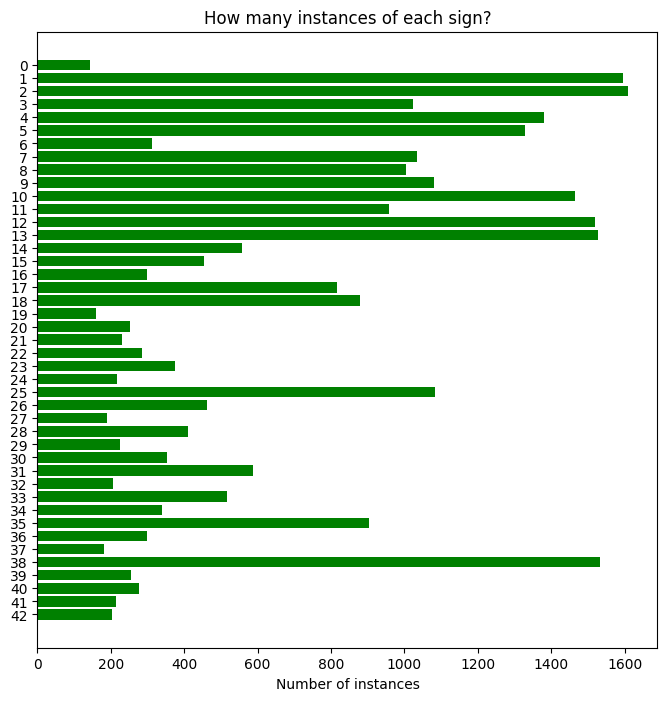

13 - Yield
18 - General caution
33 - Turn right ahead
41 - End of no passing
4 - Speed limit (70km/h)


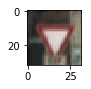

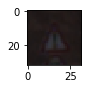

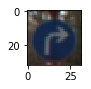

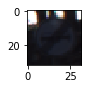

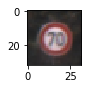

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np

%matplotlib inline

# get counts of each sign
counts = np.arange(43)
for y in y_train:
    counts[y] += 1

# show bar chart illustrating how many of each sign in training set
plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
y_pos = np.arange(len(counts))
ax.barh(y_pos, counts, #xerr=error, 
        align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
#ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of instances')
ax.set_title('How many instances of each sign?')
plt.show()


# show 5 random signs from training set
%matplotlib inline
for _ in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print("{0} - {1}".format(y_train[index], sign_names[str(y_train[index])]))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

The data is preprocessed first by converting the type to in32 from ubyte.  The data is then normalized using (pixel - 128) / 128 so that each value is in (-1, 1).  The data conversion was necessary because the ubyte will not go negative.

The training set was then randomly shuffled.  Thi sis not entirely necessary here since it will be shuffled again for each epoch.

Finally a function is added for optionally manipulating the images with rotate and flip.

A sample of before and after data is printed out to verify the operation.

In [3]:
# NOTE: the data read must be performed each time before running this code
# because this code redefines the input data as normalized data

# convert data from ubyte to int32
import numpy as np
X_train = X_train.astype(np.int32)
X_valid = X_valid.astype(np.int32)
X_test = X_test.astype(np.int32)

# normalize data to (-1, 1)
print(X_train[0,10,0:5]) # show some unnormalized data
X_train = (X_train - 128) / 128
X_valid = (X_valid - 128) / 128
X_test = (X_test - 128) / 128
print(X_train[0,10,0:5]) # show some normalized data to make sure it worked

# give initial shuffle, we will be shuffling each batch as well
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

# this can be used to flip and rotate a percentage of a batch's images
def augment_images(images):
    '''
    expects images to be of shape [b, h, w, d]
    '''
    for i in range(images.shape[0]):
        if(i % 5 == 0):
            new_image = np.rot90(images[i], k=1)
        elif(i % 5 == 1):
            new_image = np.rot90(images[i], k=2)
        elif(i % 5 == 2):
            new_image = np.rot90(images[i], k=3)
        elif(i % 5 == 3):
            new_image = np.transpose(images[i], (1, 0, 2))
        else:
            new_image = images[i]
        images[i] = new_image

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [254 255 255]
 [249 254 255]]
[[ 0.9921875  0.9921875  0.9921875]
 [ 0.9921875  0.9921875  0.9921875]
 [ 0.9921875  0.9921875  0.9921875]
 [ 0.984375   0.9921875  0.9921875]
 [ 0.9453125  0.984375   0.9921875]]


### Model Architecture

#### Hyper parameters
The scalars for epochs and batch size are defined here.  

Learning rate is defined as a variable tensor so that it can be updated during training.  We have the option to keep it constant or decay it by a devisor every epoch.

The dropout keep probability is defined as a placeholder so its value can be passed in from the feed_dict.  This is necessary so that it can be one value for training and 1.0 for evaluation and runtime predictions.

In [4]:
# init main hyper parameters
import tensorflow as tf
# init epochs and batch size
EPOCHS = 20
BATCH_SIZE = 64
# define learning rate
LEARNING_RATE = 0.0015 
learning_rate = tf.Variable(LEARNING_RATE, trainable=False)
# we can keep learning rate constant or we can decay it every epoch by the following
# learning_rate = learning_rate / LEARNING_RATE_DIVISOR
LEARNING_RATE_DIVISOR = 1.05
#setup dropout
KEEP_PROB = 0.5
keep_prob = tf.placeholder(tf.float32)
print("Main hyper parameters defined.")

Main hyper parameters defined.


#### LeNet Architecture
The architecture is a 5 layer LeNet.  The first two are convolution layers.  The first layer convolves inputs to dimension 28 X 28 X 6 and runs outputs through a ReLU activation and then a pooling operation further reduces dimension to 14 X 14 X 6. The second layer follows the same process resulting in a dimension of 5 X 5 X 16.  This is then flattened to a single dimension of 400 input for the next 2 layers which are fully connected and include a ReLU activation as well, resulting in a fourth layer output dimension of 84.  The optional dropout is then applied before the fifth layer reulting in output dimension 43.  These are the logits - the predictions of the CNN.

In [5]:
from tensorflow.contrib.layers import flatten

# defines a 5 layer LeNet architecture to be run on data set X
def LeNet(X):
    '''
    run 5 layer LeNet on data set X of size (batch, 32, 32, 3)
    return logits vector of size batch
    '''
    mu = 0.0     # mean 
    sigma = 0.1  # std dev
    # shape is filter_height X filter_width X in_channels X out_channels
    W = tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)
    
    # layer 1 convolution - output 28 X 28 X 6
    layer1_W = tf.Variable(W)
    layer1_b = tf.Variable(tf.zeros(6))
    layer1 = tf.nn.conv2d(X, layer1_W, strides=[1, 1, 1, 1], padding='VALID') + layer1_b
    
    # layer 1 activation
    layer1 = tf.nn.relu(layer1)
    
    # layer 1 pooling - output 14 X 14 X 6 - again using NHWC format
    layer1 = tf.nn.max_pool(layer1, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
    
        # Layer 2 convolution - output 10 X 10 X 16
    W = tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev = sigma)
    layer2_W = tf.Variable(W)
    layer2_b = tf.Variable(tf.zeros(16))
    layer2 = tf.nn.conv2d(layer1, layer2_W, strides=[1, 1, 1, 1], padding='VALID') + layer2_b
    
    # layer 2 activation
    layer2 = tf.nn.relu(layer2)
    
    # layer 2 pooling - output 5 X 5 X 16
    layer2 = tf.nn.max_pool(layer2, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
      
    # fully connected layer regression 400 in, 120 out
    layer3_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    layer3_b = tf.Variable(tf.zeros(120))
    flattened = flatten(layer2)
    layer3 = tf.matmul(flattened, layer3_W) + layer3_b
    
    # fully connected layer activation
    layer3 = tf.nn.relu(layer3)
    
    # Layer 4 fully connected 120 in, 84 out
    layer4_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    layer4_b = tf.Variable(tf.zeros(84))
    layer4 = tf.matmul(layer3, layer4_W) + layer4_b
    
    # layer 4 activation
    layer4 = tf.nn.relu(layer4)
    
    # apply dropout before final readout layer
    layer4 = tf.nn.dropout(layer4, keep_prob)
    
    # Layer 5 fully connected, 84 in, 43 out
    layer5_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    layer5_b = tf.Variable(tf.zeros(43))
    layer5 = tf.matmul(layer4, layer5_W) + layer5_b
    
    return layer5 # as the logits
    
print("LeNet function defined")

LeNet function defined


In [6]:
# define X and y input batches of unknown size
batch_X = tf.placeholder(tf.float32, (None, 32, 32, 3))
batch_y = tf.placeholder(tf.uint8, (None))
one_hot_y = tf.one_hot(batch_y, 43)
print("Input batches defined.")

Input batches defined.


#### Pipeline Definition 
1. use LeNet to calculate the logits, 
2. calculate cross entropy with softmax and one hot encoding
3. calculate the loss
4. back propagate to update parameters using Adam optimizer

In [7]:
# create pipeline
logits = LeNet(batch_X)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)
print("Pipeline created.")

Pipeline created.


### Train, Validate and Test the Model

The model is trained by dividing the training set into batches.  Each image in a atch is run through the model, then loss is calculated for the entire batch, and then run through back propagation.  The optimizer is the Adam optimizer as this generally gets better results than SGD. The batch size is configurable.  

Each run through the entire training data set is an epoch and the number of epochs is configurable.  The model is run on the validation set for a measure of accuracy at the end of each epoch.  

Dropout can be included or excluded and the keep probability is configurable.

The learning rate is also configurable and may be static across all epochs or it may decay with each epoch by dividing the previous learning rate by a divisor which is also configurable.  I tried using some of the learning rate decay functions provided by TensorFlow but found them difficult.

The training code includes early exit tests for two conditions 1) a very low accuracy rate that is not improving, 2) an accuracy rate that is very high > 0.99.

The model is saved at the end of a successful run.  Much experimentation was done without saving the model however.

The last saved model ended up with a validation accuracy 0.989.  This was achieved with a learning rate starting at 0.0015 and decaying by 5% with each epoch.  I ran 20 epochs which was usually more than enough to get accuracy above 0.98.  A dropout rate of 0.5 was used to prevent overfitting to the training data.

The final model was run on the test data set just once for an accuracy of 0.941.

In [8]:
# model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        X, y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={ batch_X: X, batch_y: y, keep_prob: 1.0})
        total_accuracy += accuracy * len(X)
    return total_accuracy / num_examples

print("Model evaluation set up.")

Model evaluation set up.


In [9]:
# train model and measure accuracy with validation set on each epoch
import time
import sys

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    #print(time.asctime())
    print()
    for i in range(EPOCHS): 
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):   
            end = offset + BATCH_SIZE       
            X, y = X_train[offset:end], y_train[offset:end]
            feed_dict={ batch_X: X, batch_y: y, keep_prob: KEEP_PROB}
            sess.run(training_operation, feed_dict=feed_dict)
            
        validation_accuracy = evaluate(X_valid, y_valid) 

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Learning rate: {}".format(sess.run(learning_rate)))
        #print(time.asctime())
        print()
        # decay learning rate, comment out below to not decay learning rate
        # if decaying learning rate, hyper parameters code sectoin must be 
        # redefined before running again so that learning_tensor gets re-initialized
        # otherwise, learning rate will pick up where it left off at end of last run!
        learning_rate = learning_rate / LEARNING_RATE_DIVISOR
        
        if(i > 5 and validation_accuracy < 0.3):
            print("Terminating prematurely due to low accuracy rate {:.3f}".format(validation_accuracy))
            break
        if(i > 5 and validation_accuracy > 0.99):
            print("Terminating because we achieved accuracy rate of {:.3f} which is greater than 0.99.".format(validation_accuracy))
            break 
            
    print("Finished!") 
    
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.849
Learning rate: 0.001500000013038516

EPOCH 2 ...
Validation Accuracy = 0.909
Learning rate: 0.001428571529686451

EPOCH 3 ...
Validation Accuracy = 0.963
Learning rate: 0.0013605443527922034

EPOCH 4 ...
Validation Accuracy = 0.965
Learning rate: 0.0012957565486431122

EPOCH 5 ...
Validation Accuracy = 0.975
Learning rate: 0.0012340538669377565

EPOCH 6 ...
Validation Accuracy = 0.976
Learning rate: 0.0011752895079553127

EPOCH 7 ...
Validation Accuracy = 0.967
Learning rate: 0.001119323424063623

EPOCH 8 ...
Validation Accuracy = 0.982
Learning rate: 0.0010660223197191954

EPOCH 9 ...
Validation Accuracy = 0.982
Learning rate: 0.0010152594186365604

EPOCH 10 ...
Validation Accuracy = 0.984
Learning rate: 0.00096691376529634

EPOCH 11 ...
Validation Accuracy = 0.986
Learning rate: 0.0009208702831529081

EPOCH 12 ...
Validation Accuracy = 0.986
Learning rate: 0.0008770193671807647

EPOCH 13 ...
Validation Accuracy = 0.987
Learning rat

In [32]:
#saver = tf.train.Saver()
with tf.Session() as sess:
    #saver.restore(sess, './lenet')
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))   

Test Accuracy = 0.941


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Two different sets of 5 images are used.  One set are jpg and photos of real signs on the street.  These have trees and clouds in background, are not necessarily centered, and might be skewed at an angle. The next set are png and are drawings of the signs like you might find in Adobe Illustrator for example.  

These images are grabbed from Google images.  I had to keep referencing signnames.csv and a Wikipedia page on German Road Signs to make sure I had the correct signs and correctly labeled!  Both sets have two of the same signs, the traffic signal sign and the pedestrians sign.

The signs were of varying sizes and the png images had 4 channels.  I had to account for this in loading the data.  After laoding and resizing, the 10 images are displayed along with the y vectors showing the true labels against which the predictions will be compared. 

[ 1 27 26 15 18]
[ 3 27 26 22 36]


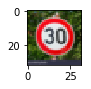

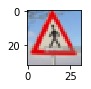

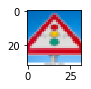

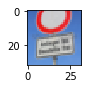

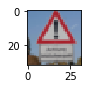

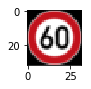

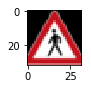

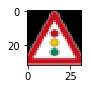

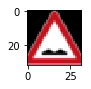

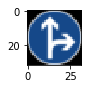

In [10]:
import matplotlib.pyplot as plt
import scipy.ndimage

%matplotlib inline

# crop image to a square, then shrink to 32X32, return resulting image
def crop_and_resize(image):
    min_dim = min(image.shape[0], image.shape[1])
    height = image.shape[0]
    width = image.shape[1]
    h_start = (height-min_dim) // 2
    h_end = height - h_start
    w_start = (width-min_dim) // 2
    w_end = width - w_start
    image = image[h_start:h_end, w_start:w_end, :]
    image = scipy.misc.imresize(image, (32, 32, 3))
    return image

# these are jpg "from the wild"
image_list = [["./download/speedlimit30.jpg", 1], 
          ["./download/pedestrians.jpg", 27],
          ["./download/trafficsignals.jpg", 26],
          ["./download/novehicles.jpg", 15],
          ["./download/generalcaution.jpg", 18]
          ]
X_jpg = np.empty((5,32,32,3), int)
y_jpg = np.empty((5), int)
i = 0
for image_info in image_list:
    image = scipy.ndimage.imread(image_info[0], mode="RGB")
    image = crop_and_resize(image)
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    X_jpg[i] = image
    y_jpg[i] = image_info[1]
    i += 1
#print(X_jpg[0, 5, 0:5, :]) # show a few pixels of first image
print(y_jpg)

# these are png "just a clean drawing of the sign"
image_list = [["./download/speedlimit60.png", 3], 
          ["./download/pedestrians.png", 27],
          ["./download/trafficsignals.png", 26],
          ["./download/bumpyroad.png", 22],
          ["./download/gostraightorright.png", 36]
          ]
X_png = np.empty((5,32,32,3), int)
y_png = np.empty((5), int)
i = 0
for image_info in image_list:
    image = scipy.ndimage.imread(image_info[0], mode="RGB")
    image = crop_and_resize(image)
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    X_png[i] = image
    y_png[i] = image_info[1]
    i += 1
#print(X_png[0, 5, 0:5, :]) # show a few pixels of first image
print(y_png)    

### Predict the Sign Type for Each Image
The saved model is loaded and run against the two small image sets.  The logits are calculated and the index with the largest value is determined.  This corresponds to model prediction.  The actual and predicted values for the two sets are printed out.

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    results = sess.run(tf.argmax(logits, 1), feed_dict={batch_X: X_png, batch_y: y_png, keep_prob: 1.0})
    print("png results {0} actual {1}".format(results, y_png))
    results = sess.run(tf.argmax(logits, 1), feed_dict={batch_X: X_jpg, batch_y: y_jpg, keep_prob: 1.0})
    print("jpg results {0} actual {1}".format(results, y_jpg))
     


png results [ 3 27 26 22 36] actual [ 3 27 26 22 36]
jpg results [ 1 18  1 26  3] actual [ 1 27 26 15 18]


### Analyze Performance
The png results were perfect which is not surprising since these are mostly ideal renditions of the signs!  The jpg set results were 20%, not good!  This is understandable since the model was trained on centered, non-skewed, non-obstructed views of the signs.

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_jpg, y_jpg)
    print("Test Accuracy jpg = {:.3f}".format(test_accuracy))  
    
    test_accuracy = evaluate(X_png, y_png)
    print("Test Accuracy png = {:.3f}".format(test_accuracy)) 

Test Accuracy jpg = 0.200
Test Accuracy png = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [127]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    results = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={batch_X: X_png, batch_y: y_png})
    print("Results for png set.")
    print(results)
    print()
    results = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={batch_X: X_jpg, batch_y: y_jpg})
    print("Results for jpg set.")
    print(results)

Results for png set.
TopKV2(values=array([[  1.00000000e+00,   7.04665981e-13,   2.77087760e-13,
          1.79010694e-15,   2.67350812e-21],
       [  1.00000000e+00,   1.37546655e-10,   1.16965882e-14,
          1.97531491e-17,   6.24109530e-19],
       [  1.00000000e+00,   3.07395386e-19,   2.08341321e-25,
          1.30068680e-25,   5.61491972e-27],
       [  7.69186378e-01,   2.30628520e-01,   1.13726070e-04,
          6.31854273e-05,   8.25976531e-06],
       [  1.00000000e+00,   2.66127143e-18,   2.99742450e-34,
          7.30537654e-35,   1.76799114e-36]], dtype=float32), indices=array([[ 2,  4, 38, 11, 39],
       [26, 11, 27, 18, 38],
       [26,  4, 12, 11, 38],
       [25, 38, 29, 26, 22],
       [36, 18, 13, 12, 17]], dtype=int32))

Results for jpg set.
TopKV2(values=array([[  1.00000000e+00,   7.47400808e-10,   3.65459156e-11,
          1.30586315e-16,   7.34047355e-17],
       [  1.00000000e+00,   2.69911310e-16,   5.56227667e-22,
          5.62699144e-27,   5.72653410e-

### Final Thoughts

It is disappointing that the jpg "real world" examples did not do better.  Obviously, this model is not adequate for road use since the jpg images represent how road signs would appear to a camera mounted on a car. 

What is needed is a better data set to train on.  A dataset where all images are captured from a car's camera - inlcude various angles, various backgrounds, are partially obstructed, etc.  Training a model on such a dataset would probably require much more effort than what was expended on this lab.  Probably a more robust architecture.

I like the idea of using 32 X 32 images since most road signs will be viewed from a distance and therefor only constitute a small piece of a larger image.

I did not get to the section on displaying the network state images, but i plan to do this later as I think it is interesting and revealing about what is actually going on.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")